# 🍷 Wine Quality Prediction using Multiple Linear Regression
## Goal: Predict wine quality (score 0–10) based on physicochemical features.


"""
Wine Quality Dataset used in this project is based on:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis (2009).
"Modeling wine preferences by data mining from physicochemical properties".
Decision Support Systems, 47(4):547-553.
https://doi.org/10.1016/j.dss.2009.05.016

Data obtained from the UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/wine+quality
"""


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

print("Importations complete.")

Importations complete.


## Data Preprocessing
* Checking for missing values
* Descriptive statistics
* Visualizing the data distribution
* Checking for correlations between features

In [2]:
df_wqw = pd.read_csv('winequality-white.csv', sep=';')
df_wqw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
#df_wqr = pd.read_csv('winequality-red.csv', sep=';')
#df_wqr.info()

In [4]:
df_wqw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
487,6.6,0.34,0.28,1.3,0.035,32.0,90.0,0.99160,3.10,0.42,10.7,6
3076,6.3,0.28,0.30,3.1,0.039,24.0,115.0,0.99420,3.05,0.43,8.6,5
135,6.7,0.27,0.31,15.7,0.036,44.0,179.0,0.99790,3.26,0.56,9.6,5
3531,6.4,0.28,0.44,7.1,0.048,49.0,179.0,0.99528,3.15,0.48,9.2,5
3105,7.7,0.26,0.51,2.6,0.045,26.0,159.0,0.99126,3.00,0.50,11.2,6
4738,5.5,0.30,0.25,1.9,0.029,33.0,118.0,0.98972,3.36,0.66,12.5,6
195,6.4,0.30,0.45,3.5,0.197,76.0,180.0,0.99420,3.02,0.39,9.1,6
2230,7.1,0.20,0.36,11.6,0.042,45.0,124.0,0.99700,2.92,0.59,9.5,7
1136,6.0,0.26,0.42,5.2,0.027,70.0,178.0,0.99140,3.40,0.40,12.3,8
3387,7.6,0.36,0.49,11.3,0.046,87.0,221.0,0.99840,3.01,0.43,9.2,5


In [5]:
df_wqw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Exploratory Data Analysis (EDA)
* Visualizing the distribution of wine quality scores
* Visualizing the correlation matrix
* Visualizing the distribution of physicochemical features
* Visualizing pair plots of features against wine quality
* Pairplots / Boxplots / Histograms

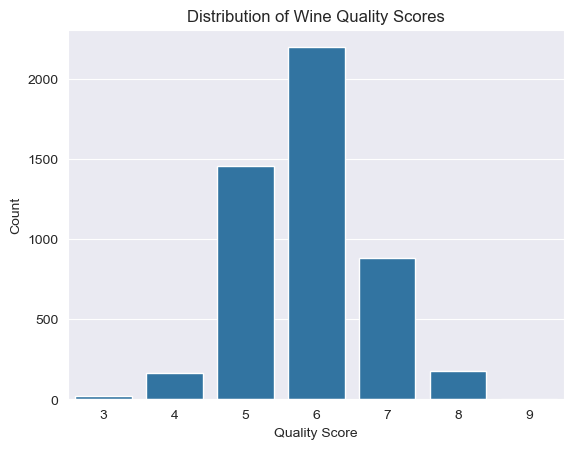

In [6]:
sns.countplot(x='quality', data=df_wqw)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

<Axes: >

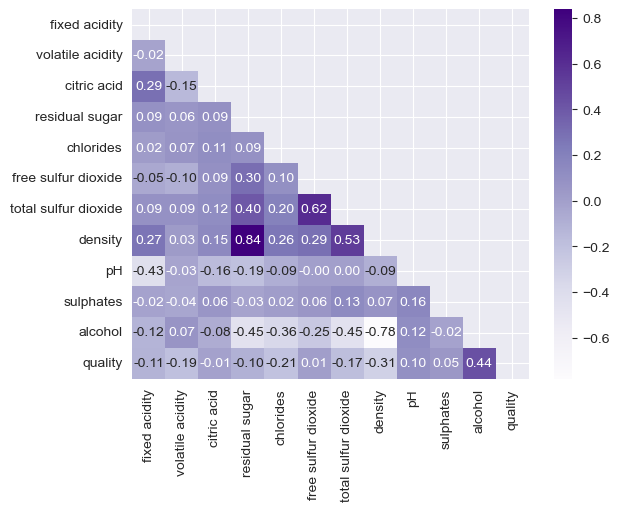

In [13]:
sns.heatmap(df_wqw.corr(), annot=True, cmap='Purples', fmt='.2f', mask=np.triu(df_wqw.corr()))

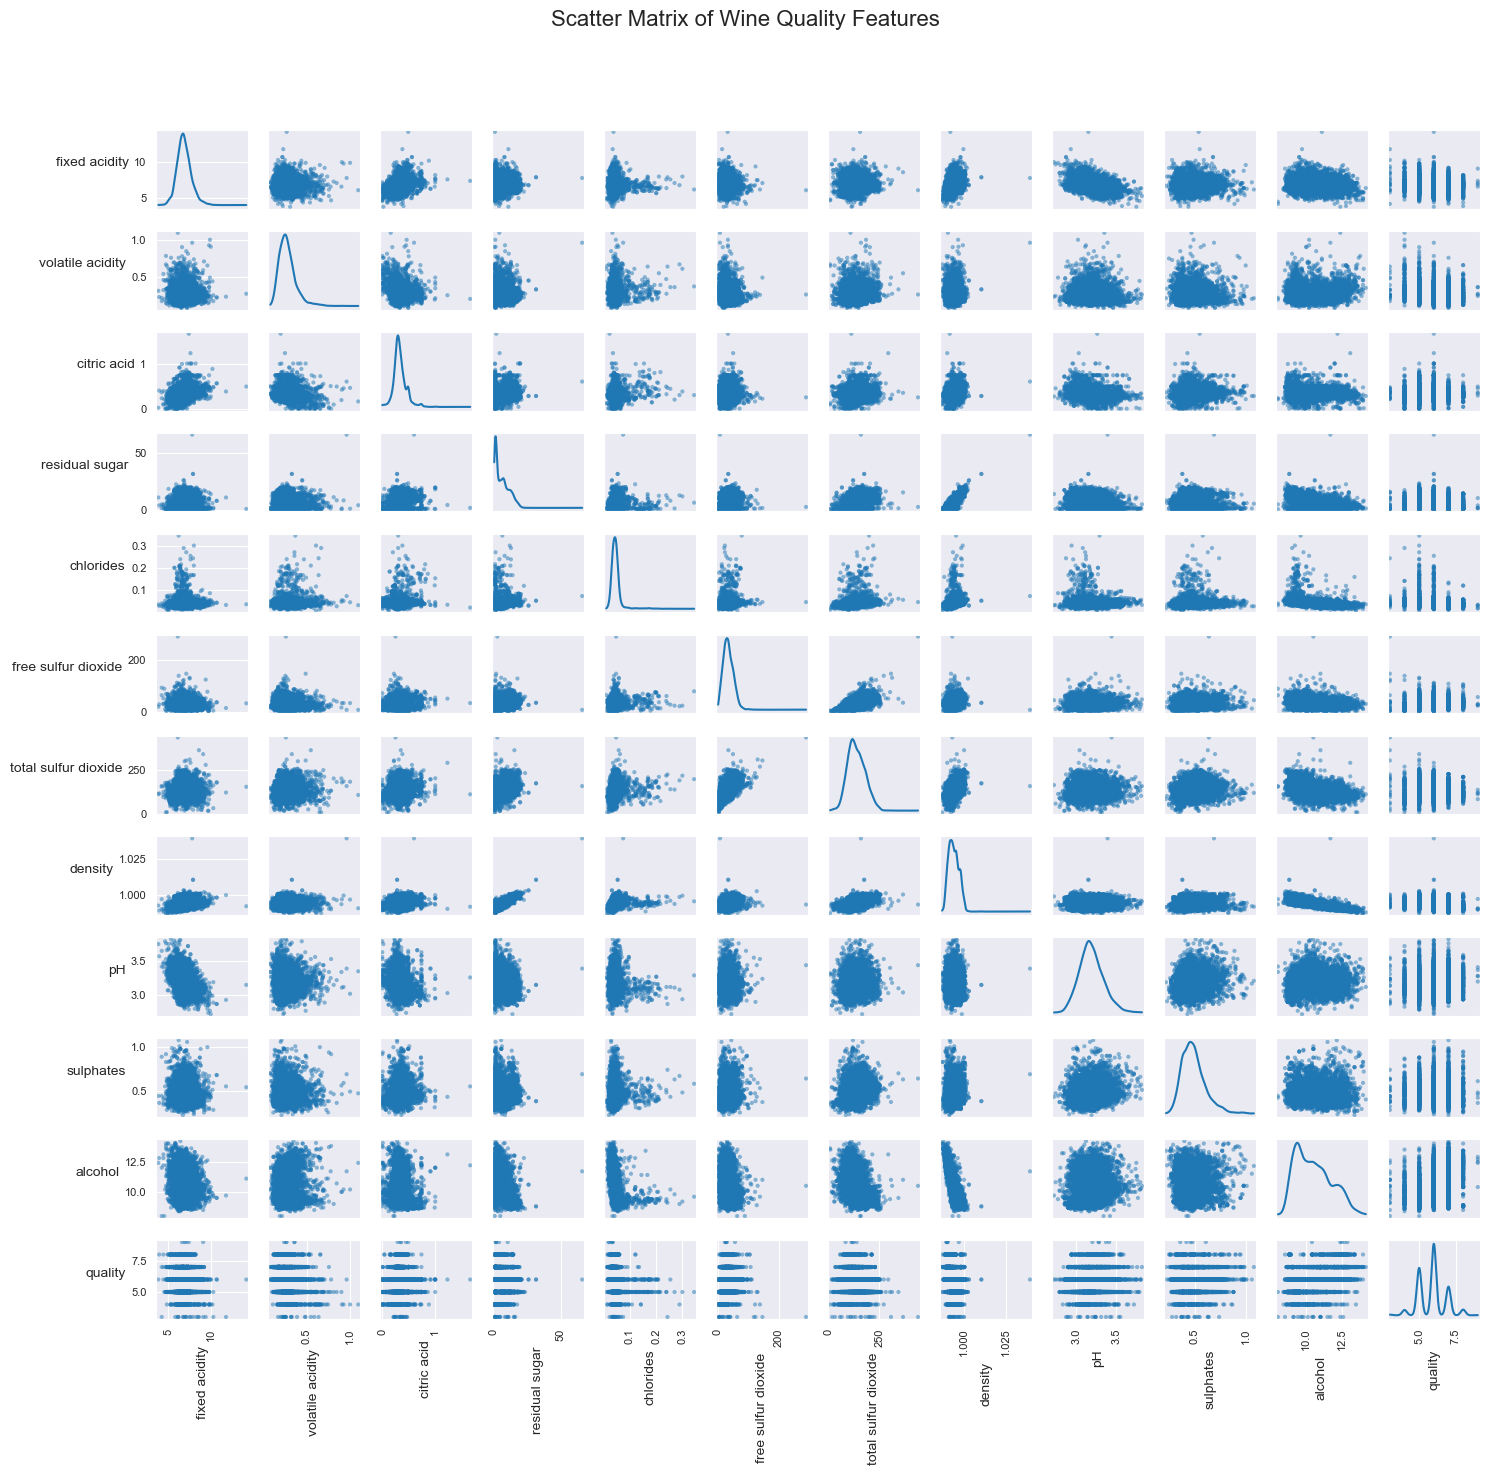

In [8]:
axes = pd.plotting.scatter_matrix(df_wqw, figsize=(15, 15), diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Matrix of Wine Quality Features', fontsize=16)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
    ax.yaxis.label.set_position((0,0.5))
plt.tight_layout()
plt.subplots_adjust(top=0.9) # Adjust the top to make room for the title
plt.show()

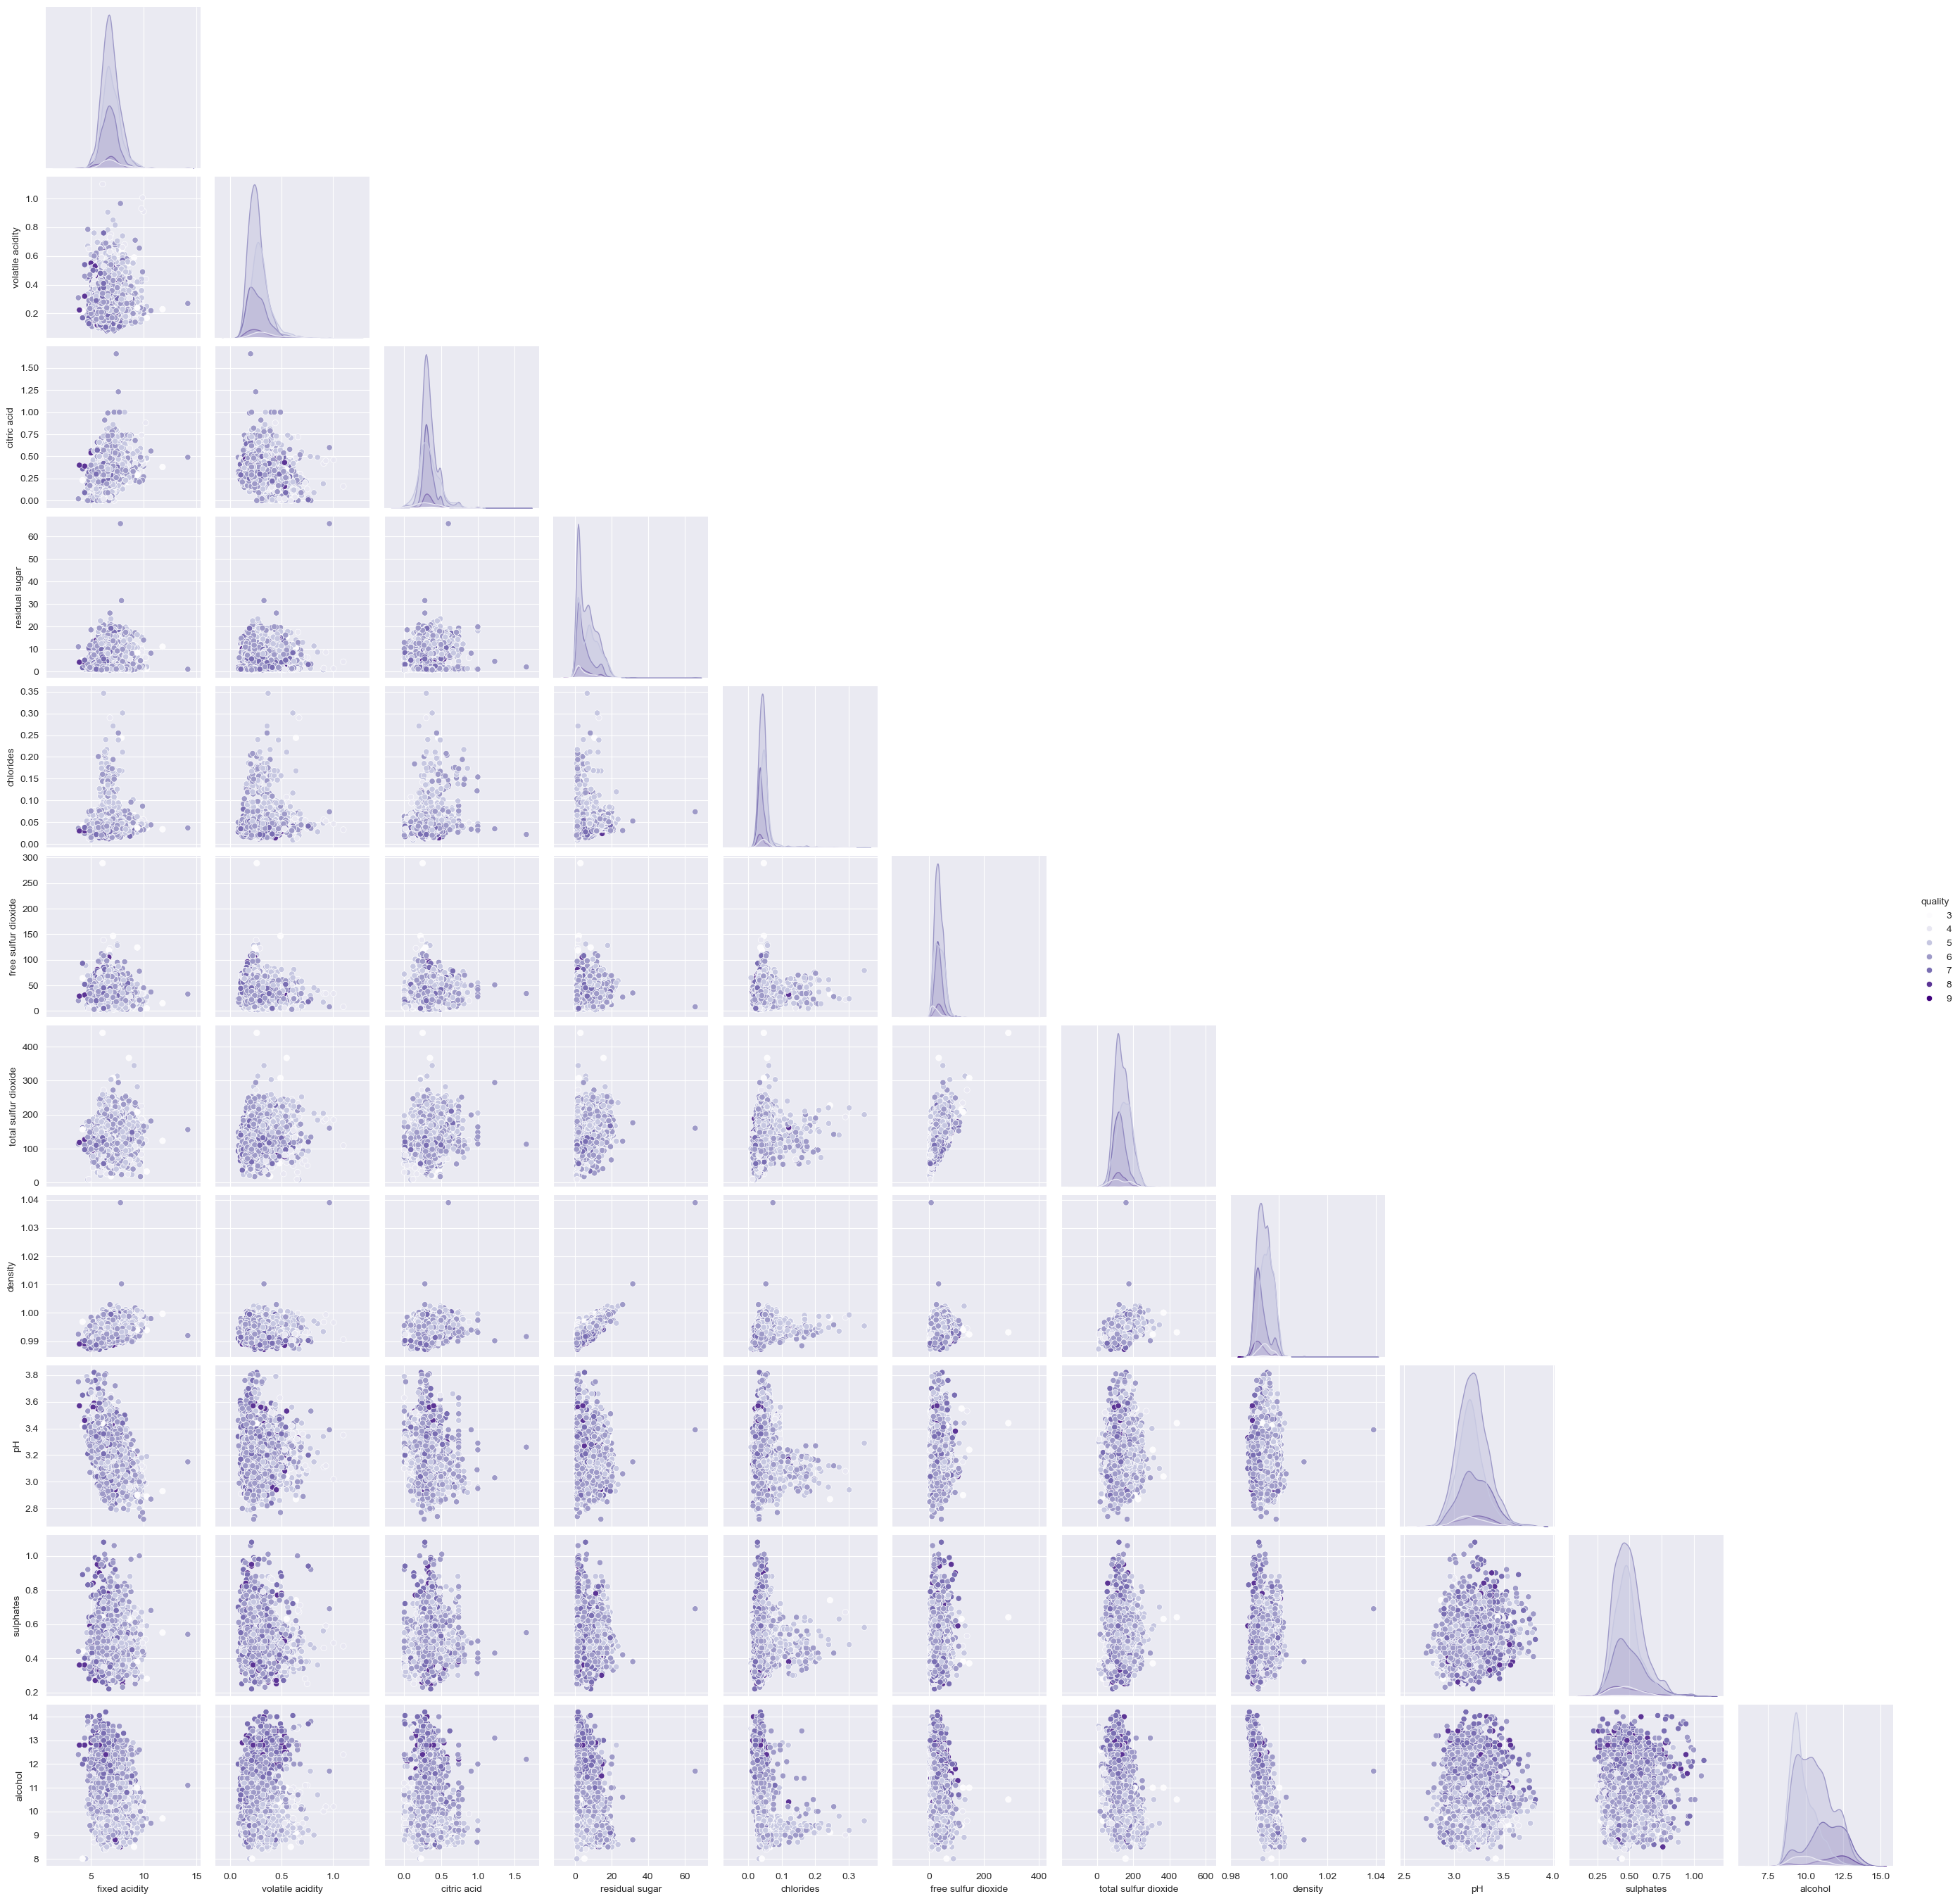

In [10]:
sns.pairplot(df_wqw, hue='quality', corner = True, palette='Purples')

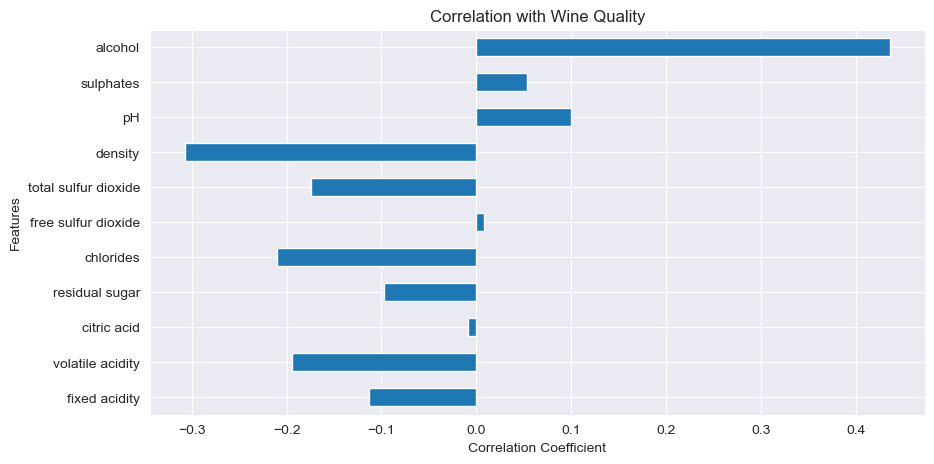

In [11]:
correlation = df_wqw.corr()["quality"].drop("quality")
correlation.plot(kind="barh", figsize=(10, 5), title="Correlation with Wine Quality")
plt.ylabel("Features")
plt.xlabel("Correlation Coefficient")
plt.show()